<a href="https://colab.research.google.com/github/DheerajKumar123987/Data-Science-Assignment4-Q2/blob/main/DataScience_Assign4_Q2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**IMPORTING** **LIABRARIES**

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as smf
import statsmodels.formula.api as sm
from sklearn.linear_model import LinearRegression

## **1.LOADING** **DATASET**



In [ ]:
from google.colab import files
df = files.upload()

Saving Salary_Data.csv to Salary_Data (1).csv


In [16]:
df = pd.read_csv("Salary_Data.csv")
df
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


## **2.Performing EDA and Plotting Data**

**CHECKING DATATYPE**

In [17]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [ ]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


**CHECKING FOR NULL AND DUPLICATE VALUES**

In [ ]:
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [ ]:
df[df.duplicated()]

,YearsExperience,Salary


## **3.Plotting the data to check for outliers**

<ipython-input-44-dc76d26eeb60>:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


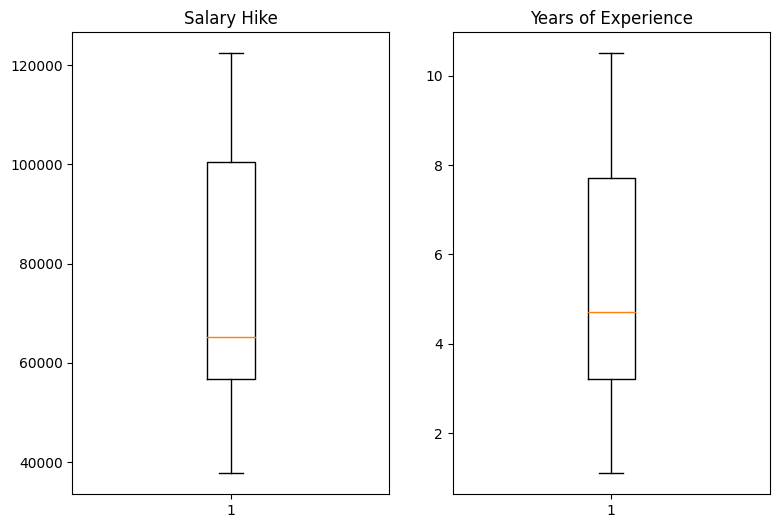

In [ ]:
plt.subplots(figsize = (9,6))
plt.subplot(1,2,1)
plt.boxplot(df['Salary'])
plt.title('Salary Hike')
plt.subplot(122)
plt.boxplot(df['YearsExperience'])
plt.title('Years of Experience')
plt.show()

**FROM THE ABOVE BOX PLOT, WE CAN CONFIRM THAT THERE ARE NO OUTLIERS**

## **4.Checking the Correlation between variables**

In [ ]:
df.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


**Visualization of Correlation beteen x and y** **using Regression Plot**

<Axes: xlabel='YearsExperience', ylabel='Salary'>

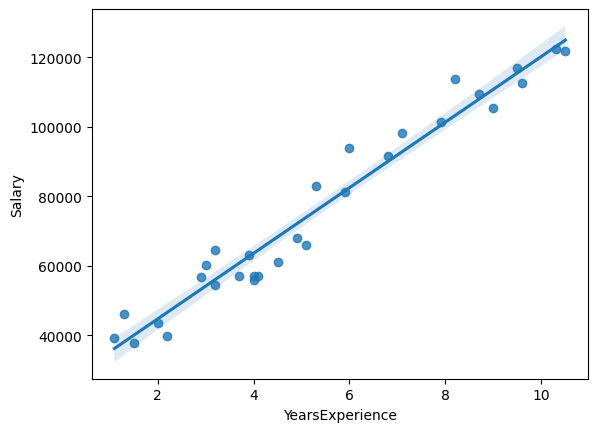

In [ ]:
sns.regplot(x=df['YearsExperience'],y=df['Salary'])  


From the above reg plot, we can see that

*   There is good correlation between the two variables
*   The score is more than 0.8 which is a good sign

## **5.Checking for Homoscedasticity or Heteroscedasticity**

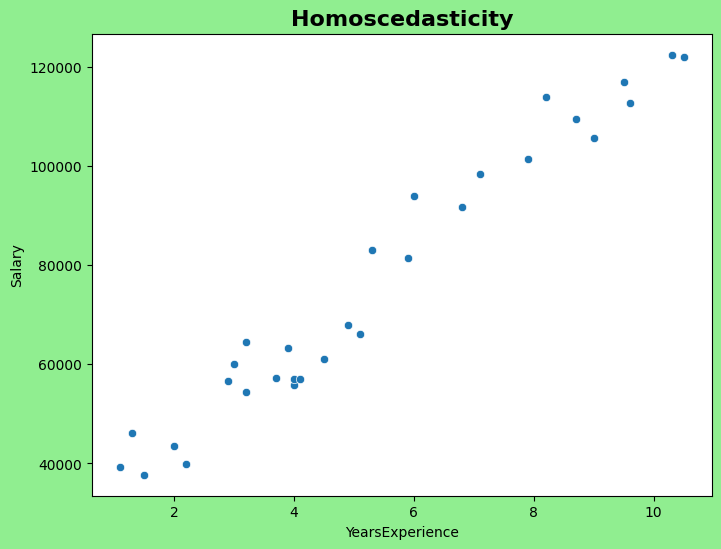

In [ ]:
plt.figure(figsize = (8,6), facecolor = 'lightgreen')
sns.scatterplot(x = df['YearsExperience'], y = df['Salary'])
plt.title('Homoscedasticity', fontweight = 'bold', fontsize = 16)
plt.show()

As you can see in above graph

1. It shows as the Years of Experience increases,salary increases and the   variation is constant along the way in data
2. The data doesn't have any specific pattern in the variation. hence, we can say it follows Homoscedasticity. Hence, square, cube root transformations are not required.







## **6.Feature Engineering**
***Trying different transformation of data to estimate normal distribution and remove any skewness**

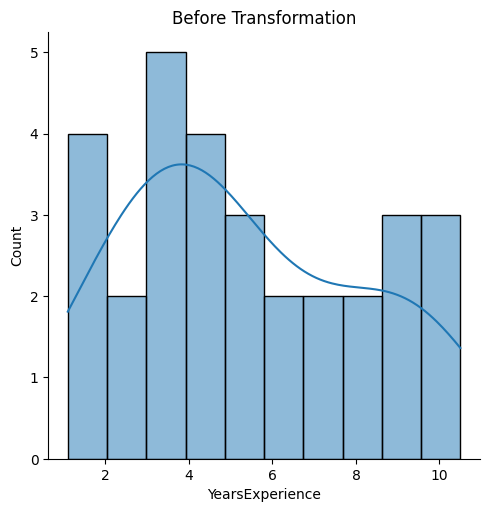

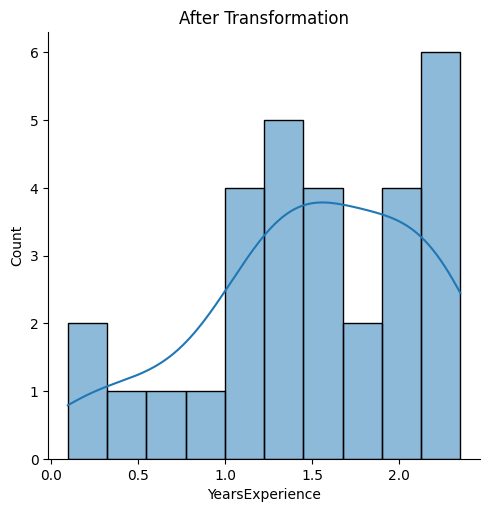

In [ ]:
sns.displot(df['YearsExperience'], bins = 10, kde = True)
plt.title('Before Transformation')
sns.displot(np.log(df['YearsExperience']), bins = 10, kde = True)
plt.title('After Transformation')
plt.show()

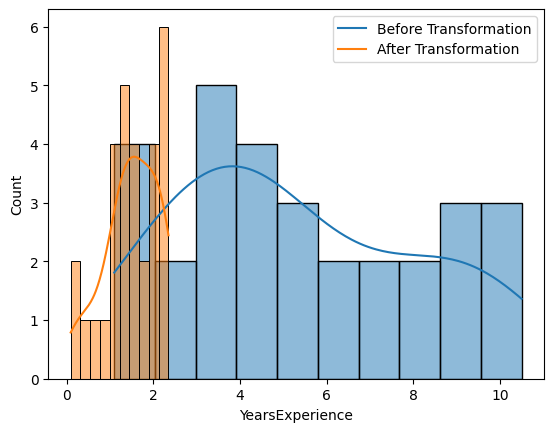

In [29]:
labels = ['Before Transformation','After Transformation']
sns.histplot(df['YearsExperience'], bins = 10, kde = True)
sns.histplot(np.log(df['YearsExperience']), bins = 10, kde = True)
plt.legend(labels)
plt.show()

As we can see

1.How log transformation affects the data and it scales the values down.

2.Before prediction it is necessary to reverse scaled the values, even for calculating RMSE for the models.(Errors)

## **Q-Q plot to ensure Normality**

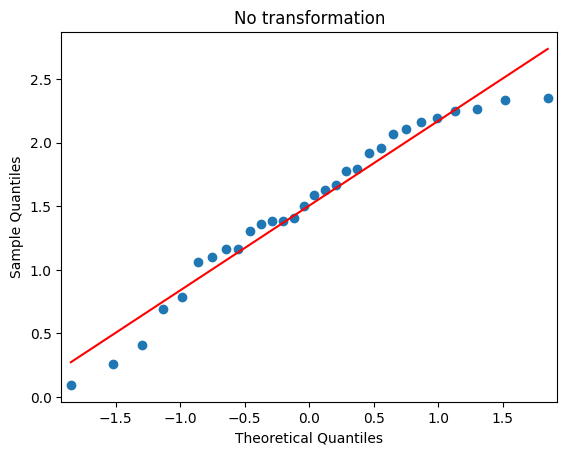

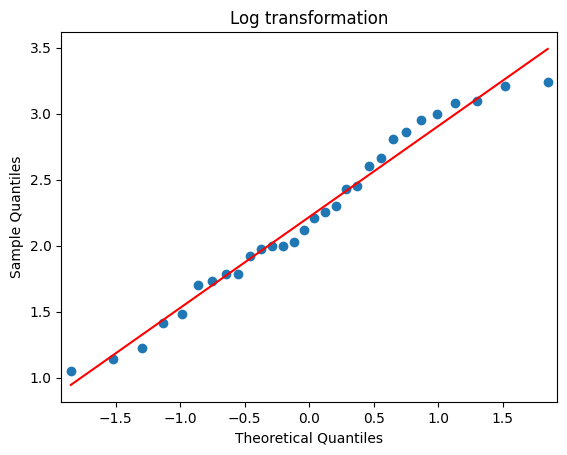

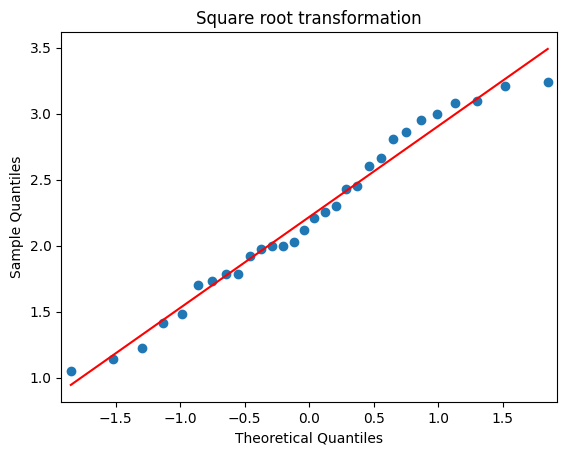

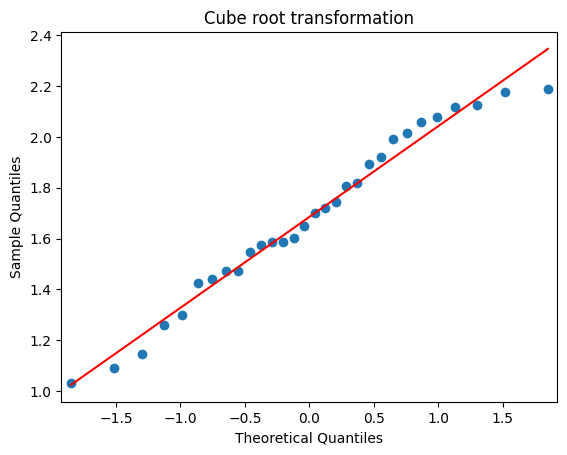

In [27]:
smf.qqplot(np.log(df['YearsExperience']), line = 'r')
plt.title('No transformation')
smf.qqplot(np.sqrt(df['YearsExperience']), line = 'r')
plt.title('Log transformation')
smf.qqplot(np.sqrt(df['YearsExperience']), line = 'r')
plt.title('Square root transformation')
smf.qqplot(np.cbrt(df['YearsExperience']), line = 'r')
plt.title('Cube root transformation')
plt.show()

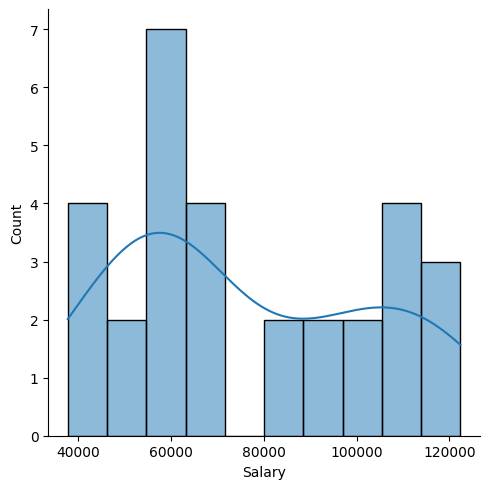

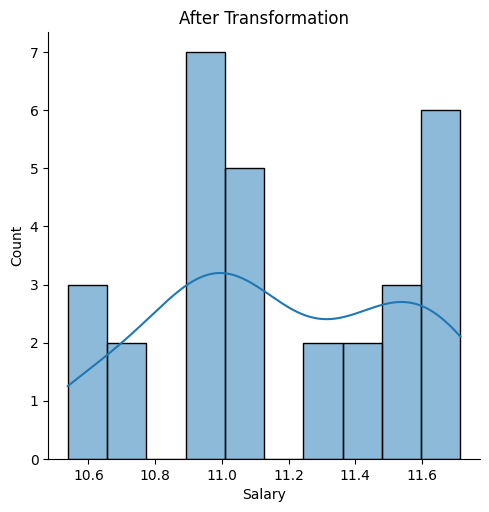

In [19]:
labels = ['Before Transformation','After Transformation']
sns.displot(df['Salary'], bins = 10, kde = True)
sns.displot(np.log(df['Salary']), bins = 10, kde = True)
plt.title('After Transformation')
plt.show()

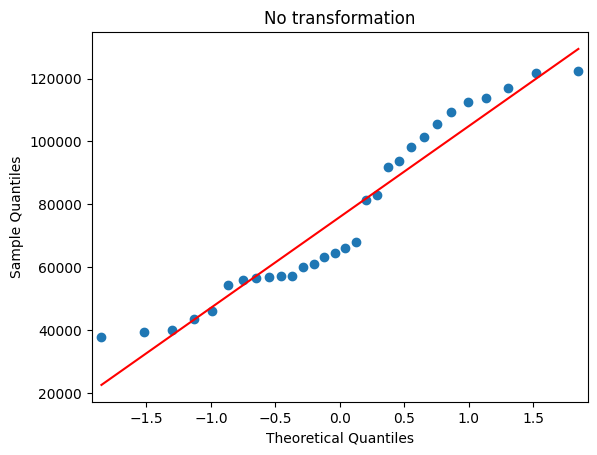

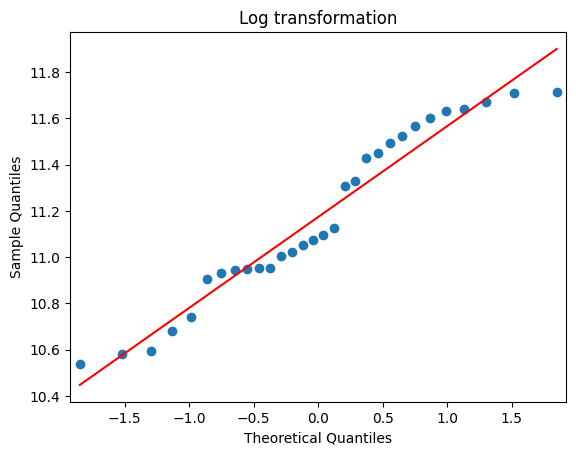

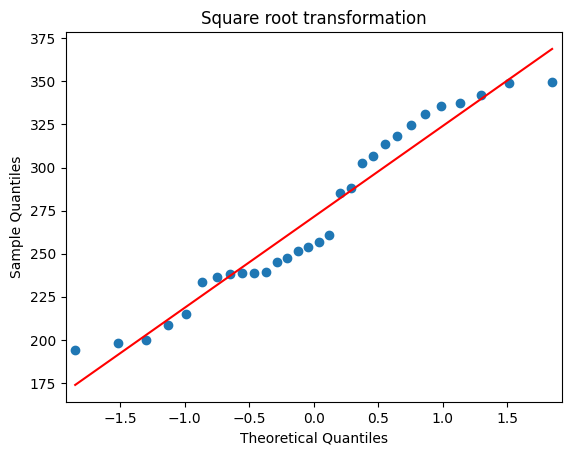

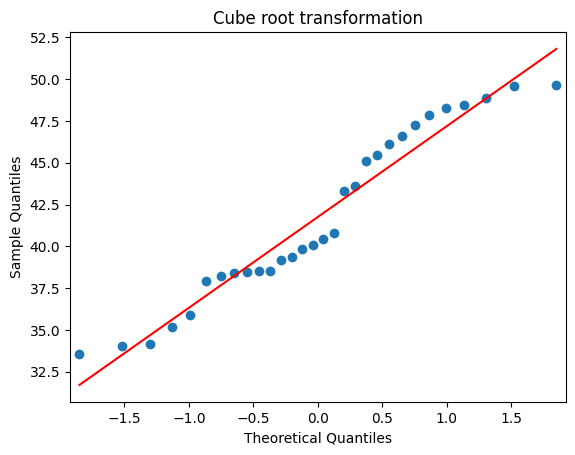

In [28]:
smf.qqplot(df['Salary'], line = 'r')
plt.title('No transformation')
smf.qqplot(np.log(df['Salary']), line = 'r')
plt.title('Log transformation')
smf.qqplot(np.sqrt(df['Salary']), line = 'r')
plt.title('Square root transformation')
smf.qqplot(np.cbrt(df['Salary']), line = 'r')
plt.title('Cube root transformation')
plt.show()

## **7. Splitting Variables and Model Fitting**

In [34]:
X= df[['YearsExperience']]
Y= df['Salary']

**Model Fitting**

In [38]:
import statsmodels.formula.api as sm
model = sm.ols('Y~X', data = df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Thu, 06 Apr 2023   Prob (F-statistic):           1.14e-20
Time:                        07:00:07   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
X           9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### **8.TRANSFORMATIONS**

### **Square Root Transformation**

In [48]:
model1 = sm.ols('np.sqrt(Y)~np.sqrt(X)', data = df).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             np.sqrt(Y)   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                     454.3
Date:                Thu, 06 Apr 2023   Prob (F-statistic):           7.58e-19
Time:                        07:13:33   Log-Likelihood:                -116.52
No. Observations:                  30   AIC:                             237.0
Df Residuals:                      28   BIC:                             239.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    103.5680      8.178     12.663      0.000      86.815     120.321
np.sqrt(X)    75.6269      3.548     21.315      0.000      68.359      82.895
==============================================================================
Omnibus:                        0.924   Durbin-Watson:                   1.362
Prob(Omnibus):                  0.630   Jarque-Bera (JB):                0.801
Skew:                           0.087   Prob(JB):                        0.670
Kurtosis:                       2.219   Cond. No.                         9.97
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### **Cube Root Transformation**

In [49]:
model2 = sm.ols('np.cbrt(Y)~np.cbrt(X)', data = df).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             np.cbrt(Y)   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     386.5
Date:                Thu, 06 Apr 2023   Prob (F-statistic):           6.37e-18
Time:                        07:13:47   Log-Likelihood:                -50.589
No. Observations:                  30   AIC:                             105.2
Df Residuals:                      28   BIC:                             108.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     16.6603      1.300     12.811      0.000      13.996      19.324
np.cbrt(X)    14.8963      0.758     19.659      0.000      13.344      16.448
==============================================================================
Omnibus:                        0.386   Durbin-Watson:                   1.229
Prob(Omnibus):                  0.824   Jarque-Bera (JB):                0.535
Skew:                           0.070   Prob(JB):                        0.765
Kurtosis:                       2.361   Cond. No.                         12.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### **LOG Transformation**

In [50]:
model3 = sm.ols('np.log(Y)~np.log(X)', data = df).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              np.log(Y)   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     267.4
Date:                Thu, 06 Apr 2023   Prob (F-statistic):           7.40e-16
Time:                        07:13:59   Log-Likelihood:                 23.209
No. Observations:                  30   AIC:                            -42.42
Df Residuals:                      28   BIC:                            -39.61
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.3280      0.056    184.868      0.000      10.214      10.442
np.log(X)      0.5621      0.034     16.353      0.000       0.492       0.632
==============================================================================
Omnibus:                        0.102   Durbin-Watson:                   0.988
Prob(Omnibus):                  0.950   Jarque-Bera (JB):                0.297
Skew:                           0.093   Prob(JB):                        0.862
Kurtosis:                       2.549   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Finding Coefficient Parameters (m and c values)**

In [44]:
model.params      


Intercept    25792.200199
X             9449.962321
dtype: float64

In [45]:
model.rsquared,model.rsquared_adj

(0.9569566641435086, 0.9554194021486339)

**Determination Coefficient = rsquared value = 0.95 ; very good fit >= 85%**

### **9.Model Validation**

In [64]:
from sklearn.metrics import mean_squared_error
model1_pred_y =np.square((model1.predict(X)))
model2_pred_y =pow(model2.predict(X),3)
model3_pred_y =np.exp(model3.predict(X))

model1_rmse =np.sqrt(mean_squared_error(Y, model1_pred_y))
model2_rmse =np.sqrt(mean_squared_error(Y, model2_pred_y))
model3_rmse =np.sqrt(mean_squared_error(Y, model3_pred_y))
print('model=', np.sqrt(model.mse_resid),'\n' 'model1=', model1_rmse,'\n' 'model2=', model2_rmse,'\n' 'model3=', model3_rmse)

model= 5788.315051119395 
model1= 5960.647096174318 
model2= 6232.815455835847 
model3= 7219.716974372806


In [47]:
rmse = {'model': np.sqrt(model.mse_resid), 'model1': model1_rmse, 'model2': model3_rmse, 'model3' : model3_rmse}
min(rmse, key=rmse.get)

'model'

**As model without any transformations has the minimum RMSE and highest Adjusted R-squared score. Hence, we are going to use the same to predict our values**

## **10. Predict the values**

In [54]:
Y_pred = model.predict(X)
Y_pred

0      36187.158752
1      38077.151217
2      39967.143681
3      44692.124842
4      46582.117306
5      53197.090931
6      54142.087163
7      56032.079627
8      56032.079627
9      60757.060788
10     62647.053252
11     63592.049484
12     63592.049484
13     64537.045717
14     68317.030645
15     72097.015574
16     73987.008038
17     75877.000502
18     81546.977895
19     82491.974127
20     90051.943985
21     92886.932681
22    100446.902538
23    103281.891235
24    108006.872395
25    110841.861092
26    115566.842252
27    116511.838485
28    123126.812110
29    125016.804574
dtype: float64

**As model has the minimum RMSE and highest Adjusted R-squared score, we can use model to predict our values**

## **EDA for Predicted Data**

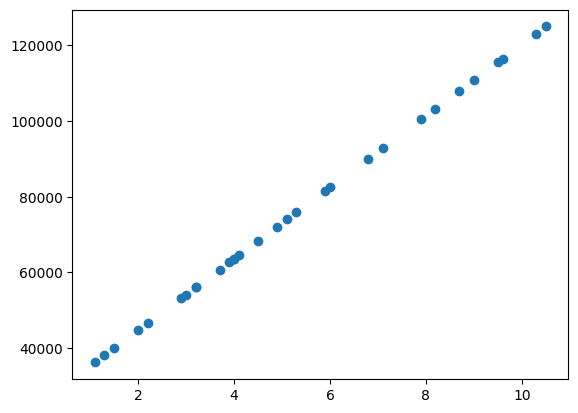

In [55]:
import matplotlib.pyplot as plt
plt.scatter(X,Y_pred)                  #scatterplot
plt.show()

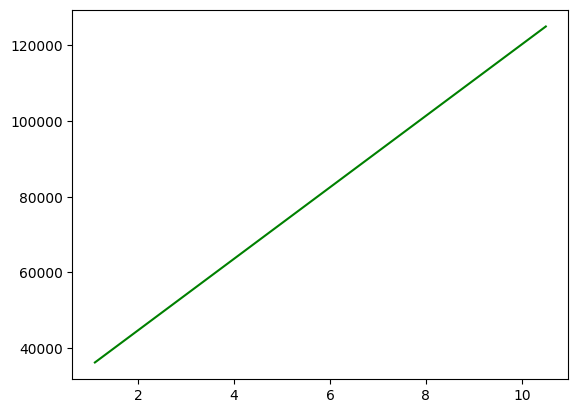

In [56]:
plt.plot(X,Y_pred,color='green')       #lineplot
plt.show()

## **MODEL PREDICTIONS**

In [57]:
# Manual prediction for say 3 Years Experience
Salary = (25792.200199) + (9449.962321)*(3)
Salary

54142.087162

In [58]:
# Automatic Prediction for say 3 & 5 Years Experience 
new_data=pd.Series([3,5])
new_data

0    3
1    5
dtype: int64

In [59]:
data_pred=pd.DataFrame(new_data,columns=['YearsExperience'])
data_pred
model.predict(data_pred)

PatsyError: ignored